In [1]:
# import necessary dependencies
import argparse
import os, sys
import time
import datetime
from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def Swish_Activation (x) :
    result = x * torch.sigmoid(x)
    return result

In [3]:
# define the ResNet mode;
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        ##########################################################
        # output channels = 16
        # number of layers in ResNet20 = (1 + 2n) = 7, n = 3
        self.conv1_16 = nn.Conv2d(in_channels  = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv2_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv3_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv4_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv5_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv6_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv7_16 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        ##########################################################
        # output channels = 32
        # number of layers in ResNet20 = 2n = 6
        self.conv8_32  = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 1)
        self.conv9_32  = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv10_32 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv11_32 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv12_32 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv13_32 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        
        # output channels = 64
        # number of layers in ResNet20 = 2n = 6
        self.conv14_64 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2, padding = 1)
        self.conv15_64 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv16_64 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv17_64 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv18_64 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.conv19_64 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        ###########################################################
        # define batch normalization layers
        # for each conv layer
        self.batch1 = nn.BatchNorm2d(num_features = 16)
        self.batch2 = nn.BatchNorm2d(num_features = 16)
        self.batch3 = nn.BatchNorm2d(num_features = 16)
        self.batch4 = nn.BatchNorm2d(num_features = 16)
        self.batch5 = nn.BatchNorm2d(num_features = 16)
        self.batch6 = nn.BatchNorm2d(num_features = 16)
        self.batch7 = nn.BatchNorm2d(num_features = 16)
        self.batch8 = nn.BatchNorm2d(num_features = 32)
        self.batch9 = nn.BatchNorm2d(num_features = 32)
        self.batch10 = nn.BatchNorm2d(num_features = 32)
        self.batch11 = nn.BatchNorm2d(num_features = 32)
        self.batch12 = nn.BatchNorm2d(num_features = 32)
        self.batch13 = nn.BatchNorm2d(num_features = 32)
        self.batch14 = nn.BatchNorm2d(num_features = 64)
        self.batch15 = nn.BatchNorm2d(num_features = 64)
        self.batch16 = nn.BatchNorm2d(num_features = 64)
        self.batch17 = nn.BatchNorm2d(num_features = 64)
        self.batch18 = nn.BatchNorm2d(num_features = 64)
        self.batch19 = nn.BatchNorm2d(num_features = 64)
        
        
        # max pooling to reduce output map size
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2, 
                                     stride      = 2)
        
        # global average pooling
        self.global_avgpool = nn.AvgPool2d(kernel_size = 8, 
                                           stride      = 8)
        # 10-way fully-connected layer
        self.fc1 = nn.Linear(in_features  = 1*1*64, 
                             out_features = 10)
        

    def forward(self, x) :
        # conv 16 - 1
        out = F.relu(self.batch1(self.conv1_16(x)))
        # Total number of shortcuts = 3 * n = 3 * 3 = 9
        # shortcut 1 starts
        shortcut = out
        # conv 16 - 2
        out = F.relu(self.batch2(self.conv2_16(out)))
        # conv 16 - 3
        out = F.relu(self.batch3(self.conv3_16(out)) + shortcut)
        # shortcut 1 ends, short 2 starts
        shortcut = out
        # conv 16 - 4
        out = F.relu(self.batch4(self.conv4_16(out)))
        # conv 16 - 5
        # shortcut 2 ends, short 3 starts
        out = F.relu(self.batch5(self.conv5_16(out)) + shortcut)
        shortcut = out
        # conv 16 - 6
        out = F.relu(self.batch6(self.conv6_16(out)))
        # conv 16 - 7
        # shortcut 3 ends, shortcut 4 starts
        out = F.relu(self.batch7(self.conv7_16(out)) + shortcut)
        shortcut = out
        
        # conv 32 - 1
        out = F.relu(self.batch8(self.conv8_32(out)))
        # conv 32 - 2
        # max pool for output map size 32*32 --> 16*16
        # zero-padding for output channels 16 --> 32
        # shortcut 4 ends, shortcut 5 starts
        shortcut = self.maxpool2(shortcut)
        shortcut = F.pad(shortcut, (0, 0, 0, 0, 8, 8))
        out = F.relu(self.batch9(self.conv9_32(out)) + shortcut)
        shortcut = out
        # conv 32 - 3
        out = F.relu(self.batch10(self.conv10_32(out)))
        # conv 32 - 4
        # shortcut 5 ends, shortcut 6 starts
        out = F.relu(self.batch11(self.conv11_32(out)) + shortcut)
        shortcut = out
        # conv 32 - 5
        out = F.relu(self.batch12(self.conv12_32(out)))
        # conv 32 - 6
        # shortcut 6 ends, shortcut 7 starts
        out = F.relu(self.batch13(self.conv13_32(out)) + shortcut)
        shortcut = out
        
        # conv 64 - 1
        out = F.relu(self.batch14(self.conv14_64(out)))
        # conv 64 - 2
        # max pool for output map size 16*16 --> 8*8
        # zero-padding for output channels 32 --> 64
        # shortcut 7 ends, shortcut 8 starts
        shortcut = self.maxpool2(shortcut)
        shortcut = F.pad(shortcut, (0, 0, 0, 0, 16, 16))
        out = F.relu(self.batch15(self.conv15_64(out)) + shortcut)
        shortcut = out
        # conv 64 - 3
        out = F.relu(self.batch16(self.conv16_64(out)))
        # conv 64 - 4
        # shortcut 8 ends, shortcut 9 starts
        out = F.relu(self.batch17(self.conv17_64(out)) + shortcut)
        shortcut = out
        # conv 64 - 5
        out = F.relu(self.batch18(self.conv18_64(out)))
        # conv 64 - 6
        # shortcut 9 ends
        out = F.relu(self.batch19(self.conv19_64(out)) + shortcut)
        
        # global average pooling
        out = self.global_avgpool(out)
        # flatten 3D --> 1D
        out = out.view(out.size(0), -1)
        # fully-connected layer with softmax activation
        # out = self.fc1(out)
        # print(str(out.shape))
        # out = F.softmax(out, dim = 1)
        # print(out)
        out = F.softmax(self.fc1(out), dim = 1)
        
        return out

### Question (a)
Here is a sanity check to verify the implementation of SimpleNN. 
You need to:
1. Write down your code.
2. **In the PDF report**, give a brief description on how the code helps you know that SimpleNN is implemented correctly.

In [4]:
#############################################
# your code here
# sanity check for the correctness of SimpleNN
# GPU check                
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device =='cuda':
    print("Run on GPU...")
else:
    print("Run on CPU...")

# Model Definition  
CheckNet = ResNet()
CheckNet = CheckNet.to(device)

# Test forward pass
data = torch.randn(5,3,32,32)
data = data.to(device)
# Forward pass "data" through "CheckNet" to get output "out" 
out = CheckNet(data)   #Your code here

# Check output shape
assert(out.detach().cpu().numpy().shape == (5,10))
print("Forward pass successful")


# Forward pass of a single image
data = torch.randn(1,3,32,32).to(device)
# Forward pass "data" through "CheckNet" to get output "out" 
out = CheckNet(data)     #Your code here

# Iterate through all the CONV and FC layers of the model
for name, module in CheckNet.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        # Get the weight of the module as a NumPy array
        wei_np = module.weight.detach().cpu().numpy()    #Your code here
        
        # Compute the number of parameters in the weight
        # Compute the number of MACs in the layer
        if isinstance(module, nn.Conv2d) :
            num_Param = len(wei_np[:,0,0,0]) * len(wei_np[0,:,0,0]) * len(wei_np[0,0,:,0]) * len(wei_np[0,0,0,:])
        if isinstance(module, nn.Linear) :
            num_Param = len(wei_np[:,0]) * len(wei_np[0,:])
        
        print(f'{name:20} {str(wei_np.shape):20} {str(num_Param):20} ')

Run on GPU...
Forward pass successful
conv1_16             (16, 3, 3, 3)        432                  
conv2_16             (16, 16, 3, 3)       2304                 
conv3_16             (16, 16, 3, 3)       2304                 
conv4_16             (16, 16, 3, 3)       2304                 
conv5_16             (16, 16, 3, 3)       2304                 
conv6_16             (16, 16, 3, 3)       2304                 
conv7_16             (16, 16, 3, 3)       2304                 
conv8_32             (32, 16, 3, 3)       4608                 
conv9_32             (32, 32, 3, 3)       9216                 
conv10_32            (32, 32, 3, 3)       9216                 
conv11_32            (32, 32, 3, 3)       9216                 
conv12_32            (32, 32, 3, 3)       9216                 
conv13_32            (32, 32, 3, 3)       9216                 
conv14_64            (64, 32, 3, 3)       18432                
conv15_64            (64, 64, 3, 3)       36864                
co

## Step 1: Set up preprocessing functions
Preprocessing is very important as discussed in the lecture.
You will need to write preprocessing functions with the help of *torchvision.transforms* in this step.
You can find helpful tutorial/API at [here](https://pytorch.org/vision/stable/transforms.html).

### Question (b)
For the question, you need to:
1. Complete the preprocessing code below.
2. **In the PDF report**, briefly describe what preprocessing operations you used and what are the purposes of them.

Hint: 
1. Only two operations are necessary to complete the basic preprocessing here.
2. The raw input read from the dataset will be PIL images.
3. Data augmentation operations are not mendatory, but feel free to incorporate them if you want.
4. Reference value for mean/std of CIFAR-10 images (assuming the pixel values are within [0,1]): mean (RGB-format): (0.4914, 0.4822, 0.4465), std (RGB-format): (0.2023, 0.1994, 0.2010)

In [5]:
# useful libraries
import torchvision
import torchvision.transforms as transforms

#############################################
# your code here
# specify preprocessing function
transform_train = transforms.Compose([transforms.ToTensor(), 
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                           (0.2023, 0.1994, 0.2010)),
                                      # Lab 2 (a)
                                      # Data Augmentation
                                      # Random Crop and Random Flip
                                      transforms.RandomHorizontalFlip(p = 0.5),
                                      transforms.RandomCrop(size = (32, 32),
                                                            # pad_if_needed = True)])
                                                            padding = 2)])
                                                            # padding = 4)])

transform_val = transforms.Compose([transforms.ToTensor(), 
                                    transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                         (0.2023, 0.1994, 0.2010))])
#############################################

## Step 2: Set up dataset and dataloader

### Question (c)
Set up the train/val datasets and dataloders that are to be used during the training. Check out the [official API](https://pytorch.org/docs/stable/data.html) for more information about **torch.utils.data.DataLoader**.

Here, you need to:
1. Complete the code below.

In [6]:
# do NOT change these
from tools.dataset import CIFAR10
from torch.utils.data import DataLoader

# a few arguments, do NOT change these
DATA_ROOT = "./data"
TRAIN_BATCH_SIZE = 128
VAL_BATCH_SIZE = 100

#############################################
# your code here
# construct dataset
train_set = CIFAR10(
    root=DATA_ROOT, 
    mode='train', 
    download=True,
    transform=transform_train     # your code
)
val_set = CIFAR10(
    root=DATA_ROOT, 
    mode='val', 
    download=True,
    transform=transform_val       # your code
)

# construct dataloader
train_loader = DataLoader(
    train_set, 
    batch_size=TRAIN_BATCH_SIZE,  # your code
    shuffle=True,                # your code
    num_workers=4
)
val_loader = DataLoader(
    val_set, 
    batch_size=VAL_BATCH_SIZE,    # your code
    shuffle=False,               # your code
    num_workers=4
)
#############################################

Using downloaded and verified file: ./data\cifar10_trainval_F21.zip
Extracting ./data\cifar10_trainval_F21.zip to ./data
Files already downloaded and verified
Using downloaded and verified file: ./data\cifar10_trainval_F21.zip
Extracting ./data\cifar10_trainval_F21.zip to ./data
Files already downloaded and verified


## Step 3: Instantiate your SimpleNN model and deploy it to GPU devices.
### Question (d)
You may want to deploy your model to GPU device for efficient training. Please assign your model to GPU if possible. If you are training on a machine without GPUs, please deploy your model to CPUs.

Here, you need to:
1. Complete the code below.
2. **In the PDF report**, briefly describe how you verify that your model is indeed deployed on GPU. (Hint: check $\texttt{nvidia-smi}$.)

In [7]:
# specify the device for computation
#############################################
# your code here
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

net = ResNet()
net = net.to(device)
    
#############################################

cuda


## Step 4: Set up the loss function and optimizer
Loss function/objective function is used to provide "feedback" for the neural networks. Typically, we use multi-class cross-entropy as the loss function for classification models. As for the optimizer, we will use SGD with momentum. 

### Question (e)
Here, you need to:
1. Set up the cross-entropy loss as the criterion. (Hint: there are implemented functions in **torch.nn**)
2. Specify a SGD optimizer with momentum. (Hint: there are implemented functions in **torch.optim**)

In [8]:
import torch.nn as nn
import torch.optim as optim

# hyperparameters
# initial learning rate
# Lab 2 (c) Hyperparameter Settings
# Apply different learning rates
#INITIAL_LR = 1.0
INITIAL_LR = 0.1
#INITIAL_LR = 0.05
#INITIAL_LR = 0.02
#INITIAL_LR = 0.01
#INITIAL_LR = 0.005
#INITIAL_LR = 0.002
#INITIAL_LR = 0.001

# Lab (2) (b) A larger learning rate
#INITIAL_LR = 0.1

# momentum for optimizer
MOMENTUM = 0.9

# L2 regularization strength
REG = 1e-4
#REG = 0.01
#REG = 0.001
#REG = 0.0001
#REG = 0.00001
#REG = 0.0

#############################################
# your code here
# create loss function
criterion = nn.CrossEntropyLoss().to(device)

# Add optimizer
optimizer = optim.SGD(net.parameters(), 
                      lr = INITIAL_LR, 
                      momentum = MOMENTUM, 
                      weight_decay = REG)
#############################################

## Step 5: Start the training process.

### Question (f)/(g)
Congratulations! You have completed all of the previous steps and it is time to train our neural network.

Here you need to:
1. Complete the training codes.
2. Actually perform the training.

Hint: Training a neural network usually repeats the following 4 steps: 

**i) Get a batch of data from the dataloader and copy it to your device (GPU).**

**ii) Do a forward pass to get the outputs from the neural network and compute the loss. Be careful about your inputs to the loss function. Are the inputs required to be the logits or softmax probabilities?)**

**iii) Do a backward pass (back-propagation) to compute gradients of all weights with respect to the loss.**

**iiii) Update the model weights with the optimizer.**

You will also need to compute the accuracy of training/validation samples to track your model's performance over each epoch (the accuracy should be increasing as you train for more and more epochs).


In [9]:
# some hyperparameters
# total number of training epochs
#EPOCHS = 30
#EPOCHS = 35
#EPOCHS = 50
#EPOCHS = 70
#EPOCHS = 95
EPOCHS = 200

# learning rate decay policy
# No learning rate decay
#DECAY_EPOCHS = 10
#DECAY_EPOCHS = 30
DECAY_EPOCHS = 60
#DECAY = 1.0

# Question (h) Bonus - Learning Rate Decay
#DECAY_EPOCHS = 10
DECAY = 0.9

#train_loss_list = list()
train_acc_list = list()
#eva_loss_list = list()
eva_acc_list = list()

# the folder where the trained model is saved
CHECKPOINT_PATH = "./saved_model"

# start the training/validation process
# the process should take about 5 minutes on a GTX 1070-Ti
# if the code is written efficiently.
best_val_acc = 0
current_learning_rate = INITIAL_LR

print("==> Training starts!")
print("="*50)
for i in range(0, EPOCHS):
    # handle the learning rate scheduler.
    if i % DECAY_EPOCHS == 0 and i != 0:
        current_learning_rate = current_learning_rate * DECAY
        for param_group in optimizer.param_groups:
            param_group['lr'] = current_learning_rate
        print("Current learning rate has decayed to %f" %current_learning_rate)
    
    #######################
    # your code here
    # switch to train mode
    net.train()
    
    #######################
    
    print("Epoch %d:" %i)
    # this help you compute the training accuracy
    total_examples = 0
    correct_examples = 0

    train_loss = 0 # track training loss if you want
    
    # Train the model for 1 epoch.
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        ####################################
        # your code here
        # copy inputs to device
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        # compute the output and loss
        outputs = net(inputs)
        loss = criterion(outputs, targets.long())
        # Lab 2 Problem (c) Part 3 (Bonus)
        # Add L1 penalty as part of the loss function
        # L1 regularization value = 0.001
        #for weight_parameter in net.parameters() :
            #loss = loss + (0.001 * torch.sum(torch.abs(weight_parameter)))
        
        if i == 0 :
            if batch_idx == 0 :
                print("Initial Loss = " + str(loss))
        
        # zero the gradient
        optimizer.zero_grad()
        
        # backpropagation
        loss.backward()
        
        # apply gradient and update the weights
        optimizer.step()
        
        # count the number of correctly predicted samples in the current batch
        _, predicted = torch.max(outputs, 1)
        correct = predicted.eq(targets).sum()
        
        total_examples = total_examples + targets.shape[0]
        train_loss = train_loss + loss
        correct_examples = correct_examples + correct.item()
        
        ####################################
                
    avg_loss = train_loss / len(train_loader)
    avg_acc = correct_examples / total_examples
    print("Training loss: %.4f, Training accuracy: %.4f" %(avg_loss, avg_acc))
    #train_loss_list.append(avg_loss)
    train_acc_list.append(avg_acc)

    # Validate on the validation dataset
    #######################
    # your code here
    # switch to eval mode
    net.eval()
    
    
    #######################

    # this help you compute the validation accuracy
    total_examples = 0
    correct_examples = 0
    
    val_loss = 0 # again, track the validation loss if you want

    # disable gradient during validation, which can save GPU memory
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            ####################################
            # your code here
            # copy inputs to device
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # compute the output and loss
            outputs = net(inputs)
            loss = criterion(outputs, targets.long())
            
            # count the number of correctly predicted samples in the current batch
            _, predicted = torch.max(outputs, 1)
            correct = predicted.eq(targets).sum()
            
            total_examples = total_examples + targets.shape[0]
            val_loss = val_loss + loss
            correct_examples = correct_examples + correct.item()
            
            ####################################

    avg_loss = val_loss / len(val_loader)
    avg_acc = correct_examples / total_examples
    print("Validation loss: %.4f, Validation accuracy: %.4f" % (avg_loss, avg_acc))
    #eva_loss_list.append(avg_loss)
    eva_acc_list.append(avg_acc)
    
    # save the model checkpoint
    if avg_acc > best_val_acc:
        best_val_acc = avg_acc
        if not os.path.exists(CHECKPOINT_PATH):
            os.makedirs(CHECKPOINT_PATH)
        print("Saving ...")
        state = {'state_dict': net.state_dict(),
                 'epoch': i,
                 'lr': current_learning_rate}
        torch.save(state, os.path.join(CHECKPOINT_PATH, 'simplenn.pth'))
        
    print('')

print("="*50)
print(f"==> Optimization finished! Best validation accuracy: {best_val_acc:.4f}")

==> Training starts!
Epoch 0:
Initial Loss = tensor(2.3221, device='cuda:0', grad_fn=<NllLossBackward>)
Training loss: 2.1001, Training accuracy: 0.3539
Validation loss: 2.0613, Validation accuracy: 0.3936
Saving ...

Epoch 1:
Training loss: 1.9687, Training accuracy: 0.4892
Validation loss: 2.0101, Validation accuracy: 0.4468
Saving ...

Epoch 2:
Training loss: 1.9048, Training accuracy: 0.5534
Validation loss: 1.8976, Validation accuracy: 0.5626
Saving ...

Epoch 3:
Training loss: 1.8580, Training accuracy: 0.6014
Validation loss: 1.9831, Validation accuracy: 0.4730

Epoch 4:
Training loss: 1.8296, Training accuracy: 0.6303
Validation loss: 1.8546, Validation accuracy: 0.6004
Saving ...

Epoch 5:
Training loss: 1.8068, Training accuracy: 0.6528
Validation loss: 1.8593, Validation accuracy: 0.6012
Saving ...

Epoch 6:
Training loss: 1.7744, Training accuracy: 0.6866
Validation loss: 1.7925, Validation accuracy: 0.6670
Saving ...

Epoch 7:
Training loss: 1.7563, Training accuracy: 0.70

Validation loss: 1.6412, Validation accuracy: 0.8194

Epoch 70:
Training loss: 1.5857, Training accuracy: 0.8782
Validation loss: 1.6032, Validation accuracy: 0.8608

Epoch 71:
Training loss: 1.5857, Training accuracy: 0.8786
Validation loss: 1.6150, Validation accuracy: 0.8470

Epoch 72:
Training loss: 1.5834, Training accuracy: 0.8812
Validation loss: 1.6113, Validation accuracy: 0.8522

Epoch 73:
Training loss: 1.5842, Training accuracy: 0.8794
Validation loss: 1.6372, Validation accuracy: 0.8250

Epoch 74:
Training loss: 1.5844, Training accuracy: 0.8797
Validation loss: 1.6015, Validation accuracy: 0.8606

Epoch 75:
Training loss: 1.5807, Training accuracy: 0.8834
Validation loss: 1.6141, Validation accuracy: 0.8500

Epoch 76:
Training loss: 1.5824, Training accuracy: 0.8821
Validation loss: 1.6145, Validation accuracy: 0.8464

Epoch 77:
Training loss: 1.5852, Training accuracy: 0.8784
Validation loss: 1.6148, Validation accuracy: 0.8480

Epoch 78:
Training loss: 1.5815, Training 

Training loss: 1.5607, Training accuracy: 0.9038
Validation loss: 1.5936, Validation accuracy: 0.8690

Epoch 142:
Training loss: 1.5558, Training accuracy: 0.9093
Validation loss: 1.5893, Validation accuracy: 0.8752

Epoch 143:
Training loss: 1.5584, Training accuracy: 0.9056
Validation loss: 1.5977, Validation accuracy: 0.8654

Epoch 144:
Training loss: 1.5563, Training accuracy: 0.9086
Validation loss: 1.5815, Validation accuracy: 0.8838
Saving ...

Epoch 145:
Training loss: 1.5604, Training accuracy: 0.9048
Validation loss: 1.5940, Validation accuracy: 0.8694

Epoch 146:
Training loss: 1.5575, Training accuracy: 0.9080
Validation loss: 1.6072, Validation accuracy: 0.8564

Epoch 147:
Training loss: 1.5591, Training accuracy: 0.9058
Validation loss: 1.5990, Validation accuracy: 0.8642

Epoch 148:
Training loss: 1.5593, Training accuracy: 0.9054
Validation loss: 1.6090, Validation accuracy: 0.8528

Epoch 149:
Training loss: 1.5581, Training accuracy: 0.9067
Validation loss: 1.6067, Val

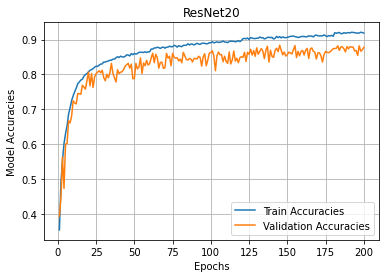

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_epochs = np.arange(1, EPOCHS + 1, 1)
figure, axis = plt.subplots()

axis.plot(x_epochs, train_acc_list, label = "Train Accuracies")
axis.plot(x_epochs, eva_acc_list, label = "Validation Accuracies")

axis.set(xlabel = "Epochs", ylabel = "Model Accuracies",
         #title = "SimpleNN, no learning rate decay"
         #title = "SimpleNN, DECAY_EPOCHS = 5, DECAY = 0.9"
         #title = "LR Decay + Data Augmentation"
         #title = "LR Decay + Data Augment + Batch Norm"
         #title = "A Larger Learning Rate (No LR Decay)"
         #title = "Data Augment + Batch Norm + Swish (No LR Decay)"
         #title = "Learning Rate = 1.0"
         #title = "Learning Rate = 0.1"
         #title = "Learning Rate = 0.05"
         #title = "Learning Rate = 0.02"
         #title = "Learning Rate = 0.01"
         #title = "Learning Rate = 0.005"
         #title = "Learning Rate = 0.002"
         #title = "Learning Rate = 0.001"
         #title = "L2 Regularization Value = 0.01"
         #title = "L2 Regularization Value = 0.001"
         #title = "L2 Regularization Value = 0.0001"
         #title = "L2 Regularization Value = 0.00001"
         #title = "L2 Regularization Value = 0.0"
         #title = "L1 Regularization Value = 0.001"
          title = "ResNet20"
           )

axis.grid()
# plt.yscale("log")
plt.legend()
plt.show()

In [11]:
# import numpy as np
# import torch
# from torch.utils.data import DataLoader
# from torchvision import transforms
# from tools.dataset import CIFAR10

DATA_ROOT = "./data"
BATCH_SIZE = 100

# same as transform_val implemented in simplenn-cifar10.ipynb
transform_test = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                          (0.2023, 0.1994, 0.2010))])

test_set = CIFAR10(
    root=DATA_ROOT, 
    mode='test', 
    download=True,
    transform=transform_test
)

# do NOT shuffle your test data loader
# otherwise the order of samples will be messed up
# and your test accuracy is likely to drop to random guessing level
test_loader = DataLoader(
    test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=1)

#########################################################
# use your model to generate predictions on test data
# and save the results into variable "results"
# "results" should be either a numpy array or a torch tensor with length of 10000

# remember to switch to eval mode whenever you are making inference
net.eval()

results = []
with torch.no_grad():
    for inputs in test_loader :
        # data in CPU, convert to GPU?
        # otherwise there would be an error
        inputs = inputs.cuda()
        # get outputs
        test_outputs = net(inputs)
        
        _, test_predicted = torch.max(test_outputs, 1)
        
        # append outputs to results
        results.append(test_predicted)

Using downloaded and verified file: ./data\cifar10_test_F21.zip
Extracting ./data\cifar10_test_F21.zip to ./data
Files already downloaded and verified


In [12]:
print(type(results))
print(type(results[0]))
print(len(results))
print(len(results[0]))
print(results)

<class 'list'>
<class 'torch.Tensor'>
100
100
[tensor([7, 3, 2, 1, 2, 2, 8, 6, 3, 6, 6, 4, 9, 1, 1, 9, 9, 7, 1, 6, 4, 2, 8, 0,
        5, 8, 0, 5, 1, 9, 3, 5, 1, 0, 7, 5, 3, 7, 0, 3, 0, 2, 7, 1, 1, 9, 8, 2,
        6, 9, 4, 8, 9, 7, 4, 5, 4, 0, 8, 3, 4, 4, 5, 7, 3, 0, 5, 2, 5, 8, 5, 7,
        4, 4, 2, 3, 3, 6, 0, 9, 5, 6, 8, 7, 4, 5, 8, 6, 5, 4, 8, 3, 0, 7, 2, 1,
        5, 4, 5, 4], device='cuda:0'), tensor([2, 8, 4, 8, 6, 1, 3, 6, 2, 7, 1, 4, 4, 9, 2, 9, 4, 8, 1, 6, 5, 5, 7, 8,
        1, 4, 9, 0, 8, 8, 3, 9, 4, 7, 6, 8, 5, 7, 0, 7, 7, 0, 8, 6, 1, 9, 1, 4,
        7, 7, 9, 9, 9, 8, 2, 6, 1, 3, 5, 3, 3, 1, 8, 2, 2, 2, 5, 5, 6, 7, 2, 7,
        8, 4, 6, 0, 9, 4, 6, 1, 8, 9, 7, 1, 0, 5, 7, 1, 5, 6, 9, 0, 5, 4, 1, 0,
        4, 1, 4, 7], device='cuda:0'), tensor([0, 7, 9, 7, 6, 2, 5, 9, 9, 5, 1, 6, 0, 8, 2, 9, 6, 2, 3, 4, 6, 1, 6, 8,
        7, 6, 7, 3, 3, 6, 1, 6, 5, 8, 2, 6, 9, 3, 8, 2, 7, 2, 1, 7, 5, 5, 1, 3,
        4, 1, 4, 0, 5, 4, 8, 1, 4, 4, 1, 5, 2, 7, 8, 4, 6, 8, 6, 5, 7, 8, 1

In [13]:
results = torch.stack(results)
results = results.view(-1)
print(type(results))
print(len(results))

<class 'torch.Tensor'>
10000


In [15]:
# results = results.detach().cpu().numpy()
results = results.cpu().detach().numpy()
print(type(results))
print(len(results))

<class 'numpy.ndarray'>
10000


In [16]:
# convert results to np array or torch tensor
#########################################################

assert isinstance(results, np.ndarray) or isinstance(results, torch.tensor)
if isinstance(results, torch.Tensor):
    results = results.cpu().numpy()
else:
    pass

with open('predictions.csv', 'w') as fp :
    fp.write("Id,Label\n")
    for i in range(len(results)) :
        fp.write("%d,%d\n" %(i, results[i]))